In [32]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
dt = pd.DataFrame()

data = pd.read_csv('timestamps_no_optimization.txt')
data['relatime'] = (data['sec']-data['sec'][0]) + (data['nsec']-data['nsec'][0])/1e9
dt['no_opt'] = pd.Series( np.diff( data['relatime'])* 1e3  );

data = pd.read_csv('timestamps_all_tunings.txt')
data['relatime'] = (data['sec']-data['sec'][0]) + (data['nsec']-data['nsec'][0])/1e9
dt['opt'] = pd.Series( np.diff( data['relatime'])* 1e3  );

In [34]:
print("Non-optimized mean dt = %.2f ms, var %.2f" %(dt['no_opt'].mean(), dt['no_opt'].var()) );
print("    Optimized mean dt = %.2f ms, var %.2f" %(dt['opt'].mean(), dt['opt'].var()) );

#for threshold in [11,12,15,20]:
#    outliers = dt[ dt > threshold ].size
#    pct = outliers / dt.size * 100
#    print("%d / %d (%.2g%%) values are greater than %.2f ms" % (outliers, dt.size, pct, threshold) )
    
#largest = dt.sort_values()
#print("Largest values:")
#print(largest.tail(10));

Non-optimized mean dt = 10.09 ms, var 3.60
    Optimized mean dt = 10.00 ms, var 0.13


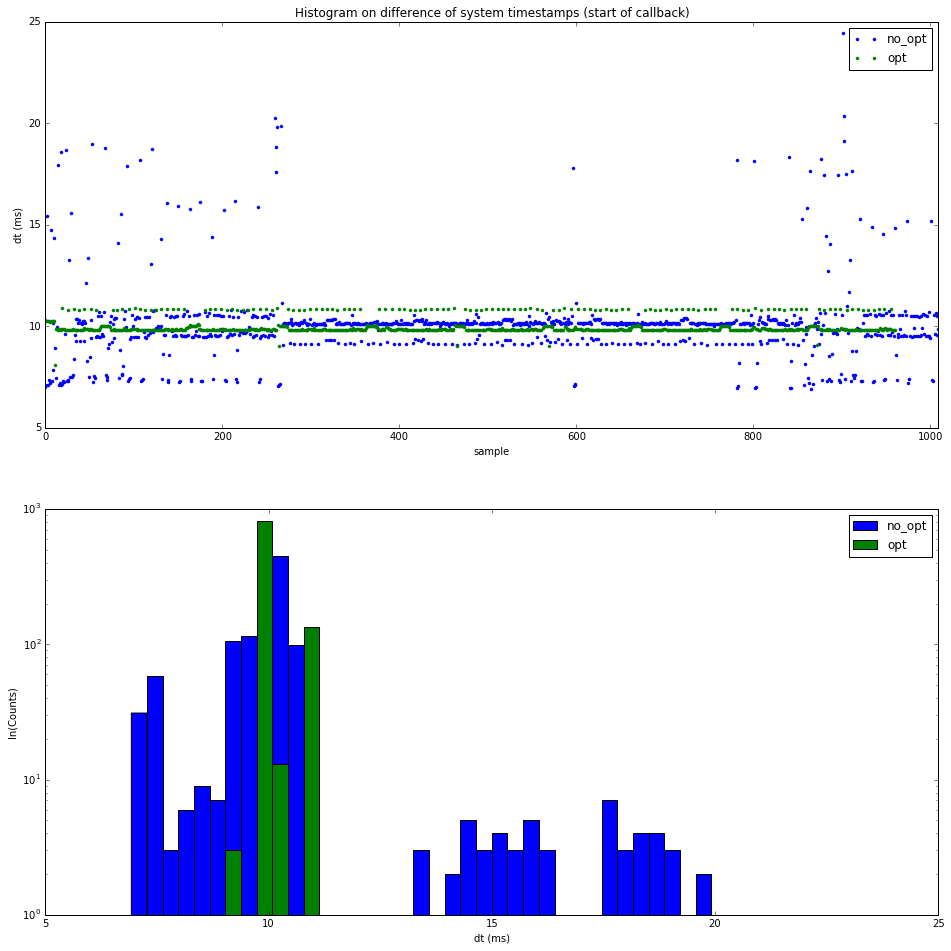

In [35]:
fig,axes = plt.subplots(figsize=(16,16), dpi=100,nrows=2,ncols=1)

dt.plot( ax=axes[0], style='.')
axes[0].set_xlabel('sample')
axes[0].set_ylabel('dt (ms)')
axes[0].set_title('Difference of system timestamps at start of callback')
#axes[0].set_ylim([0, 25])

dt.plot.hist(ax=axes[1], bins=50,logy=True)
axes[1].set_xlabel('dt (ms)')
axes[1].set_ylabel('ln(Counts)')
#axes[1].set_xlim([0,25])

axes[0].set_title('Histogram on difference of system timestamps (start of callback)');